<div style="background-color:	#41e5d3; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white">ML - Verhuuraantallen voorspellen - Heethoofd</h1>
<b style="color:white">Jasper Duncker, Julia Boschman, Nima Agha Ghafar Hamedani</b>
    </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# metrics etc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


C:\Users\bosch\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Bestanden importeren

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
Xtest = test.drop(['date_hour'],axis=1)
train["date_hour"]

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
16632    2012-11-30 19:00:00
16633    2012-11-30 20:00:00
16634    2012-11-30 21:00:00
16635    2012-11-30 22:00:00
16636    2012-11-30 23:00:00
Name: date_hour, Length: 16637, dtype: object

## Opdracht 1: EDA

##### Toon datatypes en basisstatistieken

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_hour   16637 non-null  object 
 1   holiday     16637 non-null  int64  
 2   weathersit  16637 non-null  int64  
 3   temp        16637 non-null  float64
 4   atemp       16637 non-null  float64
 5   hum         16637 non-null  float64
 6   windspeed   16637 non-null  float64
 7   cnt         16637 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.0+ MB


In [11]:
train.describe()

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,0.028671,1.415580,0.504745,0.482608,0.624756,0.190310,190.477009
std,0.166885,0.637298,0.192369,0.171557,0.193227,0.121915,182.026755
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,41.000000
50%,0.000000,1.000000,0.520000,0.500000,0.620000,0.194000,143.000000
75%,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,282.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [12]:
train.isna().sum()

date_hour     0
holiday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Voor het bestand train hebben we gekeken of het voldoet aan alle voorwaardes om een machine learning model te maken:

1. Het is een DataFrame
2. Het DataFrame heeft geen missende waardes
3. Het DataFrame had één kolom die geen numerieke waardes had en die is wordt omgezet naar een datetime kolom. Deze wordt ook gebruikt om nieuwe (numerieke) kolommen aan te maken.

Dus het bestand voldoet aan de voorwaardes.

In [13]:
test

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed
0,2012-12-01 00:00:00,0,1,0.26,0.3030,0.81,0.0000
1,2012-12-01 01:00:00,0,1,0.26,0.3030,0.81,0.0000
2,2012-12-01 02:00:00,0,2,0.26,0.3030,0.81,0.0000
3,2012-12-01 03:00:00,0,2,0.26,0.2727,0.81,0.1343
4,2012-12-01 04:00:00,0,1,0.26,0.2879,0.81,0.0896
...,...,...,...,...,...,...,...
451,2012-12-19 19:00:00,0,1,0.38,0.3939,0.50,0.3881
452,2012-12-19 20:00:00,0,1,0.36,0.3485,0.57,0.2239
453,2012-12-19 21:00:00,0,1,0.34,0.3182,0.61,0.2239
454,2012-12-19 22:00:00,0,1,0.34,0.3485,0.61,0.0896


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_hour   456 non-null    object 
 1   holiday     456 non-null    int64  
 2   weathersit  456 non-null    int64  
 3   temp        456 non-null    float64
 4   atemp       456 non-null    float64
 5   hum         456 non-null    float64
 6   windspeed   456 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 25.1+ KB


In [15]:
test.describe()

,holiday,weathersit,temp,atemp,hum,windspeed
count,456.0,456.000000,456.000000,456.000000,456.000000,456.000000
mean,0.0,1.592105,0.360132,0.363691,0.714868,0.157639
std,0.0,0.607882,0.079432,0.076354,0.177732,0.106499
min,0.0,1.000000,0.160000,0.181800,0.330000,0.000000
25%,0.0,1.000000,0.300000,0.303000,0.560000,0.089600
50%,0.0,2.000000,0.360000,0.363600,0.750000,0.134300
75%,0.0,2.000000,0.400000,0.409100,0.870000,0.223900
max,0.0,3.000000,0.600000,0.621200,1.000000,0.492500


In [16]:
test.isna().sum()

date_hour     0
holiday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

Net als bij het bestand train hebben wij gekeken naar de inhoud van het test bestand. Omdat wij deze gebruiken om uiteindelijk ons model mee te testen willen wij dit in de zelfde vorm hebben staan als het train bestand. Zo gaan wij ook in dit bestand de date_hour kolom omzetten naar een datetime en de kolom wordt gebruikt om verschillende kolommen met numerieke waardes aan te maken. Verder voldoet het ook aan alle voorwaardes:

1. Het is een DataFrame.
2. Het DataFrame heeft geen missende waardes.
3. Het DataFrame heeft alleen numerieke waardes.

##### Voeg tijdserie elementen toe en gebruik passende visualisaties om patronen zichtbaar te maken.

In [17]:
import pandas as pd
train['date_hour'] = pd.to_datetime(train['date_hour'])

# Voeg dag, week, maand, jaar
train['hour_of_day'] = train['date_hour'].dt.hour #Het uur van de dag (0-23).
train['day_of_week'] = train['date_hour'].dt.dayofweek #De dag van de week (maandag is 0, zondag is 6).
train['week'] = train['date_hour'].dt.isocalendar().week #De weken
train['month'] = train['date_hour'].dt.month
train['year'] = train['date_hour'].dt.year

#Time series / date functionality — pandas 2.1.1 documentation. (n.d.). https://pandas.pydata.org/docs/user_guide/timeseries.html

def get_season(month):
    if month in [3, 4, 5]:  
        return 1
    elif month in [6, 7, 8]:  
        return 2
    elif month in [9, 10, 11]:
        return 3
    else: 
        return 4

train['season'] = train['month'].apply(get_season)

In [23]:
import pandas as pd
test['date_hour'] = pd.to_datetime(test['date_hour'])

# Voeg dag, week, maand, jaar
test['hour_of_day'] = test['date_hour'].dt.hour #Het uur van de dag (0-23).
test['day_of_week'] = test['date_hour'].dt.dayofweek #De dag van de week (maandag is 0, zondag is 6).
test['week'] = test['date_hour'].dt.isocalendar().week #De weken
test['month'] = test['date_hour'].dt.month
test['year'] = test['date_hour'].dt.year

#Time series / date functionality — pandas 2.1.1 documentation. (n.d.). https://pandas.pydata.org/docs/user_guide/timeseries.html

def get_season(month):
    if month in [3, 4, 5]:  
        return 1
    elif month in [6, 7, 8]:  
        return 2
    elif month in [9, 10, 11]:
        return 3
    else: 
        return 4

test['season'] = test['month'].apply(get_season)

##### Visualisatie 1

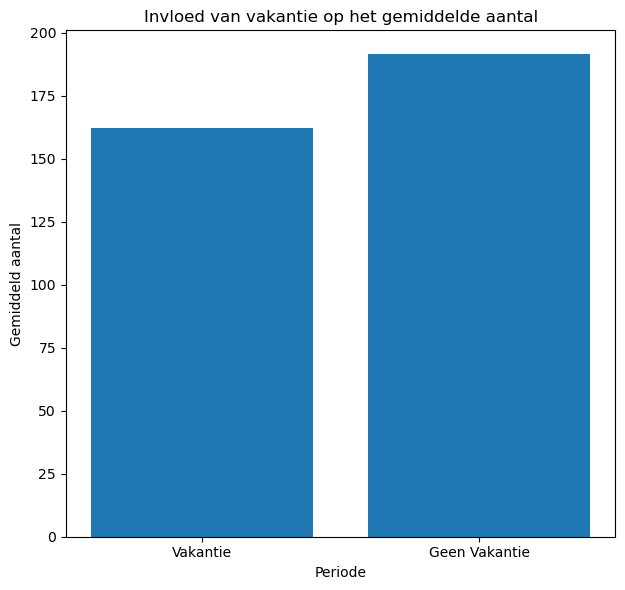

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


#Invloed van vakantie op het gemiddelde aantal
holiday_data = train[train['holiday'] == 1]
non_holiday_data = train[train['holiday'] == 0]
holiday_avg = holiday_data['cnt'].mean()
non_holiday_avg = non_holiday_data['cnt'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(['Vakantie', 'Geen Vakantie'], [holiday_avg, non_holiday_avg])
plt.xlabel('Periode')
plt.ylabel('Gemiddeld aantal')
plt.title('Invloed van vakantie op het gemiddelde aantal')


plt.tight_layout()
plt.show()

##### Visualisatie 2

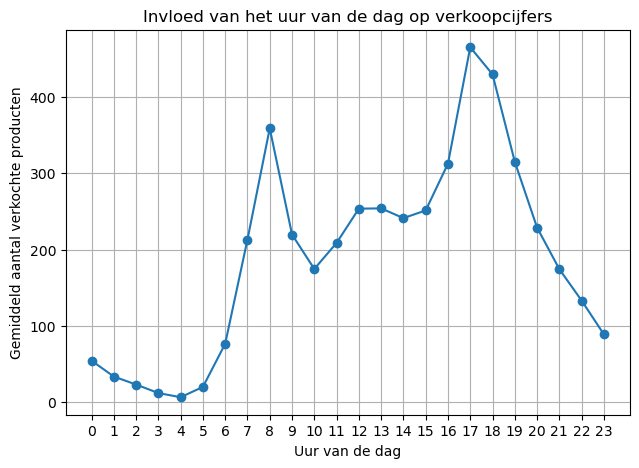

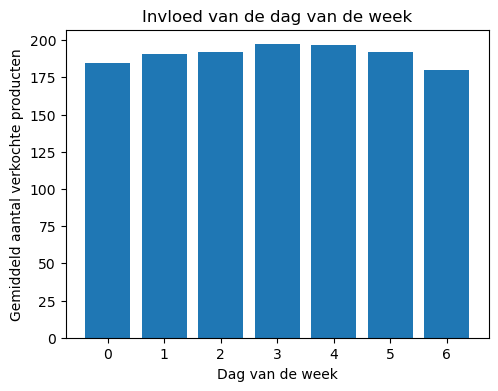

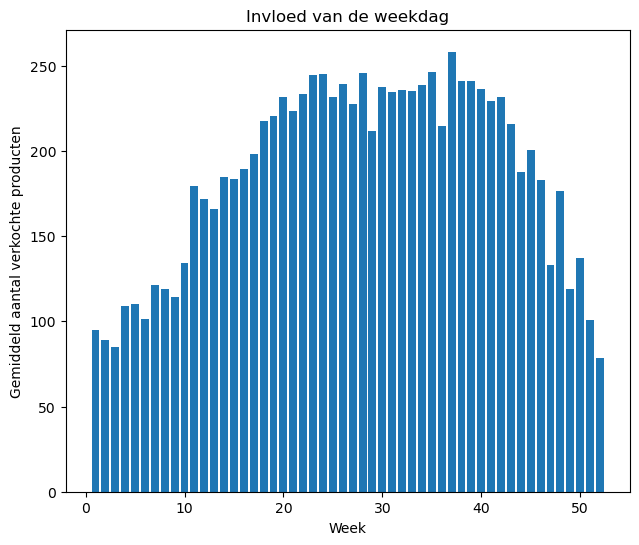

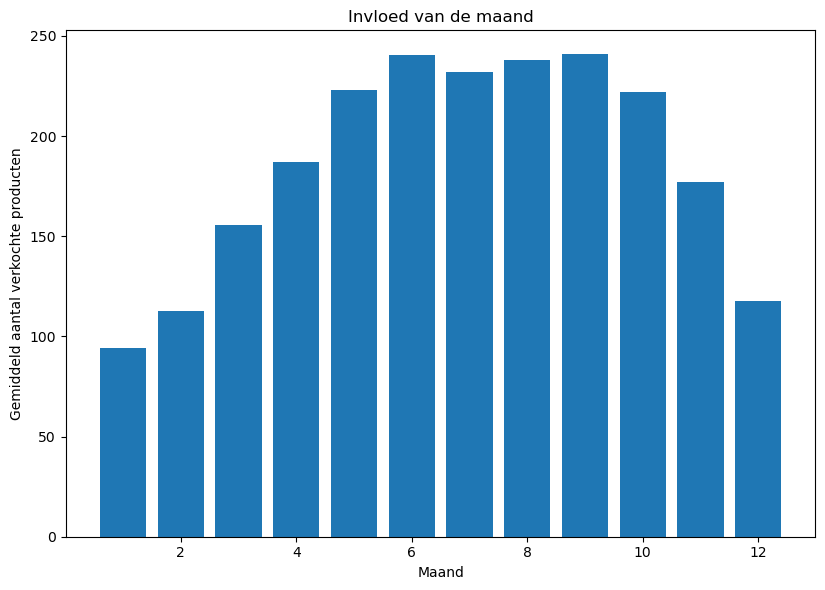

In [20]:
# Tweede grafiek: Invloed van het uur van de dag op verkoopcijfers
hourly_avg = train.groupby('hour_of_day')['cnt'].mean()
plt.figure(figsize=(16, 5))
plt.subplot(122)
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.xlabel('Uur van de dag')
plt.ylabel('Gemiddeld aantal verkochte producten')
plt.title('Invloed van het uur van de dag op verkoopcijfers')
plt.xticks(range(24))
plt.grid(True)

# Invloed van de dag van de week op de verkoop

day_of_week_avg = train.groupby('day_of_week')['cnt'].mean()
plt.figure(figsize=(12, 4))
plt.subplot(122)
plt.bar(day_of_week_avg.index, day_of_week_avg.values)
plt.xlabel('Dag van de week')
plt.ylabel('Gemiddeld aantal verkochte producten')
plt.title('Invloed van de dag van de week')

# Invloed van de weekdag op de verkoop
plt.figure(figsize=(16, 6))

weekday_avg = train.groupby('week')['cnt'].mean()
plt.subplot(122)
plt.bar(weekday_avg.index, weekday_avg.values)
plt.xlabel('Week')
plt.ylabel('Gemiddeld aantal verkochte producten')
plt.title('Invloed van de weekdag')

# Invloed van de maand op de verkoop
plt.figure(figsize=(16, 6))

month_avg = train.groupby('month')['cnt'].mean()
plt.subplot(122)
plt.bar(month_avg.index, month_avg.values)
plt.xlabel('Maand')
plt.ylabel('Gemiddeld aantal verkochte producten')
plt.title('Invloed van de maand')

plt.tight_layout()
plt.show()

##### Onderzoek de relatie tussen de onafhankelijke en de afhankelijke variabelen

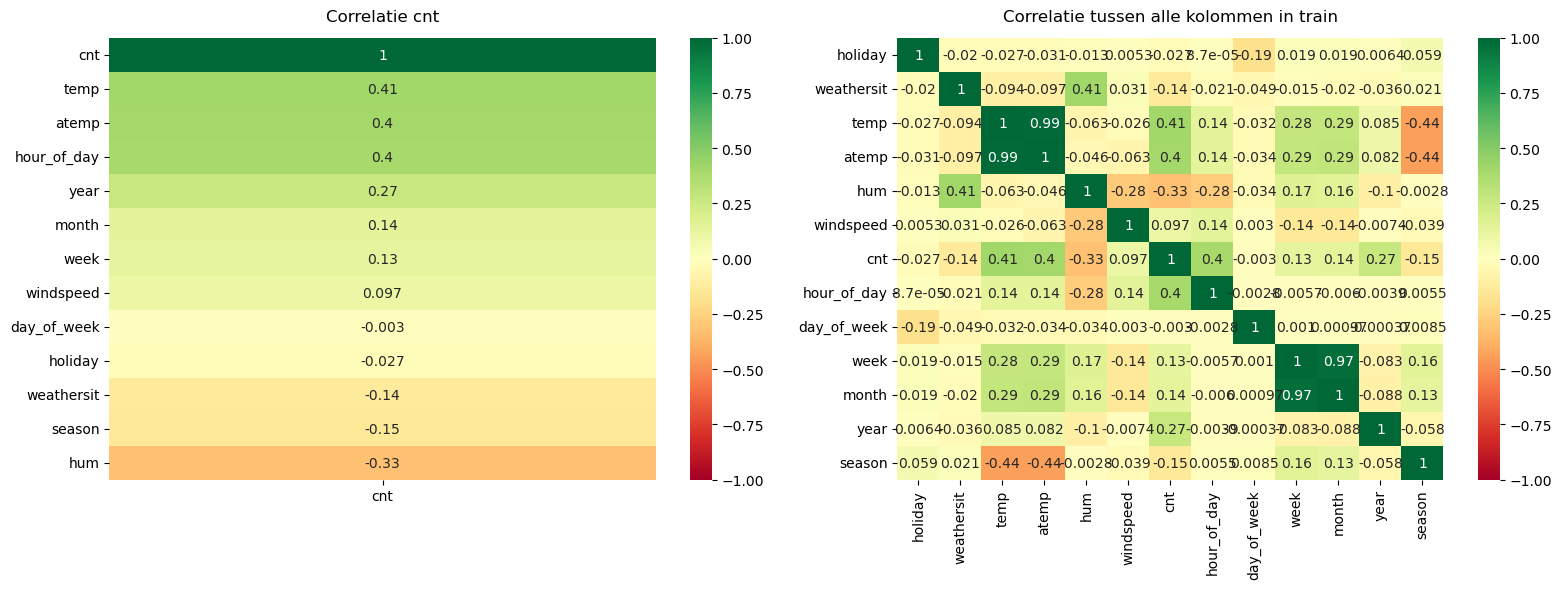

In [24]:
plt.figure(figsize=(16, 6))
plt.subplot(121)  
heatmap1 = sns.heatmap(train.corr(method='pearson')[['cnt']].sort_values(by='cnt', ascending=False),
                       vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap1.set_title('Correlatie cnt', fontdict={'fontsize': 12}, pad=12)


plt.subplot(122) 
heatmap2 = sns.heatmap(train.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap2.set_title('Correlatie tussen alle kolommen in train', fontdict={'fontsize': 12}, pad=12)

plt.tight_layout()  
plt.show()

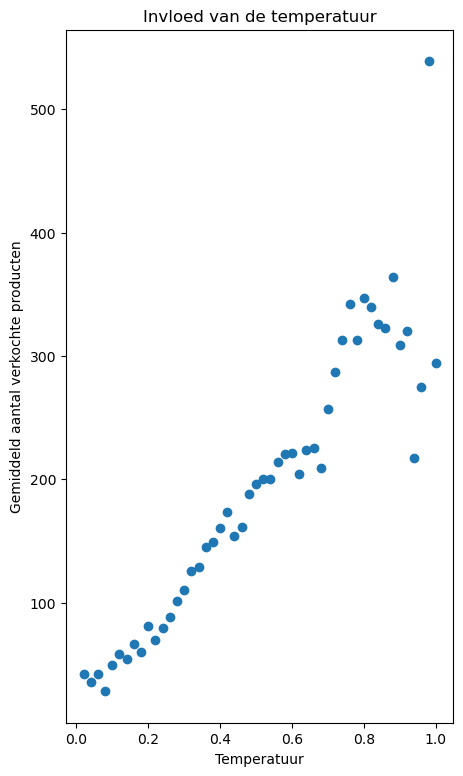

In [27]:
temp_avg = train.groupby('temp')['cnt'].mean()
plt.subplot(122)
plt.scatter(temp_avg.index, temp_avg.values)
plt.xlabel('Temperatuur')
plt.ylabel('Gemiddeld aantal verkochte producten')
plt.title('Invloed van de temperatuur')
plt.show()

### Metric Functie

In [22]:
def train_test_model(model):
    """
    Traint het opgegeven model met behulp van de meegeleverde trainingsgegevens en evalueert het met de testgegevens.

    Parameters:
    ----------
    model : model vergelijkbaar met sklearn
        Het model dat getraind en geëvalueerd moet worden.
    
    Returns:
    -------
    RMSE :
        Deze functie drukt de RMSE score van het model op de testgegevens af.
    
        
    """

    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = MSE**0.5
    R2 = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    return print('R2:',R2,
                 '\nMAE:', MAE,
                 '\nMSE:',MSE,
                 '\nRMSE:',RMSE)

### TimeSeries

### Train, test, split

In [22]:
from sklearn.model_selection import train_test_split
X = train.drop(['date_hour','cnt'],axis=1)
y = train['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

### LinearReg

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

train_test_model(lin_reg)
lin_reg_pred = lin_reg.predict(X_test)


R2: 0.39626737211971463 
MAE: 105.8303560242363 
MSE: 19891.0638475316 
RMSE: 141.03568288745797


### Randomforest

### Pushen Kaggle

In [19]:
def push_dataframe(p_id_values, predictions_values, push=True, csv_file_path=None):
    """
    Creëert een DataFrame met kolommen 'p_id' en 'predictions' en slaat het op naar een CSV-bestand (optioneel).

    Args:
        p_id_values (list): Een lijst met waarden voor de 'p_id'-kolom.
        predictions_values (list): Een lijst met waarden voor de 'predictions'-kolom.
        push (bool): Een boolean die aangeeft of het DataFrame moet worden opgeslagen naar een CSV-bestand.
        csv_file_path (str): Het pad naar het CSV-bestand waarin het DataFrame moet worden opgeslagen (alleen nodig als push=True).

    Returns:
        pd.DataFrame: Een DataFrame met de opgegeven kolommen.
    """
    
    # Flatten the predictions_values array if it's 2D
    if len(predictions_values.shape) > 1:
        predictions_values = predictions_values.flatten()
        
    data = {'date_hour': p_id_values, 'cnt': predictions_values}
    df = pd.DataFrame(data)
    
    if push and csv_file_path:
        df.to_csv(csv_file_path, index=False)
        print(f"CSV file '{csv_file_path}' has been created.")
    
    return df

In [20]:
csv_file_path = r'C:\Users\nimaa\2023-2024\machine_learning\portfolio\Portfolio Deurwaardes\kaggle_sub\lin_reg_pred.csv'

#parameters
id_values = test['date_hour'] # niet veranderen
predictions_values = lin_reg_pred #predictions van model

# push functie toepassen
push_dataframe(id_values, predictions_values, push=True, csv_file_path=csv_file_path)

CSV file 'C:\Users\nimaa\2023-2024\machine_learning\portfolio\Portfolio Deurwaardes\kaggle_sub\lin_reg_pred.csv' has been created.


,date_hour,cnt
0,2012-12-01 00:00:00,47.597274
1,2012-12-01 01:00:00,47.597274
2,2012-12-01 02:00:00,54.376420
3,2012-12-01 03:00:00,49.224786
4,2012-12-01 04:00:00,45.748686
...,...,...
451,2012-12-19 19:00:00,190.899991
452,2012-12-19 20:00:00,149.103906
453,2012-12-19 21:00:00,125.979449
454,2012-12-19 22:00:00,131.131082
